<a href="https://colab.research.google.com/github/jubin-k/IPL-2008-2016/blob/main/IPL_2008_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Import the Data**

In [ ]:
#1. Get Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df_match=pd.read_csv("/content/matches.csv")
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


**2. Data exploration and Data cleaning**

In [ ]:
df_match.shape

(636, 18)

In [ ]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df_match.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

<AxesSubplot:>

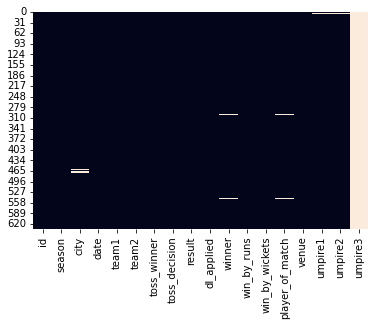

In [ ]:
sns.heatmap(df_match.isna(),cbar=False)

In [ ]:
df_match.iloc[450:500,:]
#we can see that the null values are alligned with the dubai int cricket stadium, so it can be filled with Dubai

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
450,451,2013,Pune,2013-05-19,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,normal,0,Pune Warriors,38,0,LJ Wright,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,NaN
451,452,2013,Bangalore,2013-05-18,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,24,0,V Kohli,M Chinnaswamy Stadium,C Shamshuddin,RJ Tucker,NaN
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker,NaN
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
457,458,2014,Abu Dhabi,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN
458,459,2014,Sharjah,2014-04-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,YS Chahal,Sharjah Cricket Stadium,Aleem Dar,S Ravi,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN


In [ ]:
df_match=df_match.fillna({'city':'Dubai'})

In [ ]:
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
#there are 3 missing values in both winner and player of match
df_match['result'].value_counts()
#we can see there is no result for the three games.we can drop this rows

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [ ]:
df_match=df_match.dropna(subset=['winner','player_of_match'],axis=0)
#no need to deal with umpire null value since we'll not be cosidering it for analysis

In [ ]:
df_match[df_match['result']=='no result']['id']
#to drop these rows from the next dataframe

Series([], Name: id, dtype: int64)

In [ ]:
df_del=pd.read_csv("/content/deliveries.csv")
df_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51144,216,2,Deccan Chargers,Chennai Super Kings,14,5,A Symonds,TL Suman,SB Jakati,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
51145,216,2,Deccan Chargers,Chennai Super Kings,14,6,A Symonds,TL Suman,SB Jakati,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
51146,216,2,Deccan Chargers,Chennai Super Kings,15,1,TL Suman,A Symonds,S Tyagi,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
51147,216,2,Deccan Chargers,Chennai Super Kings,15,2,TL Suman,A Symonds,S Tyagi,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df_del.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df_del.isna().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    48542
dismissal_kind      48542
fielder             49271
dtype: int64

In [ ]:
#dropping matches with no result
to_drop1=df_del[df_del['match_id']==301].index
to_drop2=df_del[df_del['match_id']==546].index
to_drop3=df_del[df_del['match_id']==571].index

In [ ]:
df_del=df_del.drop((df_del[(df_del['match_id']==301) | (df_del['match_id']==546) | (df_del['match_id']==571)].index),axis=0)

In [ ]:
df_del.shape

(51149, 21)

In [ ]:
#We don't need all the columns but specific columns from both the dataframes
#from df_match we need id,season,city,team1,team2,toss_decision
#from df_del , we need total runs,

In [ ]:
df_match['team1'].unique()
df_del['bowling_team'].unique()
#Deccan charger=sunrisers hydbd
#Rising Pune Supergiant = Rising Pune Supergiants

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers'], dtype=object)

In [ ]:
df_match['team1']=df_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team2']=df_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team1']=df_match['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_match['team2']=df_match['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_match['winner']=df_match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['winner']=df_match['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_del['batting_team']=df_del['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_del['batting_team']=df_del['batting_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df_del['bowling_team']=df_del['bowling_team'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [ ]:
df_score = df_del.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
df_score = df_score[df_score['inning'] == 1]
df_score

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
428,212,1,153.0
430,213,1,181.0
432,214,1,184.0
434,215,1,154.0


In [ ]:
df_match.rename(columns={'id':'match_id'},inplace=True)

In [ ]:
df_runs = df_match.merge(df_score[['match_id','total_runs']],on='match_id')
df_runs

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,184.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,183.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,163.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,2010,Jaipur,2010-04-07,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,9,MJ Lumb,Sawai Mansingh Stadium,S Ravi,SK Tarapore,NaN,153.0
212,213,2010,Kolkata,2010-04-07,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,14,0,SC Ganguly,Eden Gardens,BG Jerling,RE Koertzen,NaN,181.0
213,214,2010,Bangalore,2010-04-08,Royal Challengers Bangalore,Sunrisers Hyderabad,Deccan Chargers,field,normal,0,Sunrisers Hyderabad,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN,184.0
214,215,2010,Chandigarh,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN,154.0


In [ ]:
delivery_df = df_runs.merge(df_del,on='match_id')

In [ ]:
df_del2=delivery_df[delivery_df['inning']==2]
df_del2
df_del2.iloc[:,9:20]

,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs_x,inning
125,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0,2
126,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0,2
127,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0,2
128,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0,2
129,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207.0,2
...,...,...,...,...,...,...,...,...,...,...,...
51144,0,Sunrisers Hyderabad,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,138.0,2
51145,0,Sunrisers Hyderabad,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,138.0,2
51146,0,Sunrisers Hyderabad,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,138.0,2
51147,0,Sunrisers Hyderabad,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,138.0,2


In [ ]:
df_del2['current_score'] = df_del2.groupby('match_id').cumsum()['total_runs_y']

In [ ]:
df_del2['runs_left'] = df_del2['total_runs_x'] - df_del2['current_score']

In [ ]:
df_del2['balls_left'] = 126 - (df_del2['over']*6 + df_del2['ball'])

In [ ]:
df_del2['player_dismissed'] = df_del2['player_dismissed'].fillna("0")
df_del2['player_dismissed'] = df_del2['player_dismissed'].apply(lambda x:x if x == "0" else "1")
df_del2['player_dismissed'] = df_del2['player_dismissed'].astype('int')
wickets = df_del2.groupby('match_id').cumsum()['player_dismissed'].values
df_del2['wickets'] = 10 - wickets

In [ ]:
#and also in dl applied, non rainy situations
df_del2=df_del2[df_del2['dl_applied']==0]
df_del2.drop(['dl_applied'],axis=1,inplace=True)

In [ ]:
df_del2.rename(columns={'total_runs_x':'total_runs'},inplace=True)

In [ ]:
df_del2['crr'] = (df_del2['current_score']*6)/(120 - df_del2['balls_left'])

In [ ]:
df_del2['rrr'] = (df_del2['runs_left']*6)/df_del2['balls_left']

In [ ]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

In [ ]:
df_del2['Result'] = df_del2.apply(result,axis=1)

In [ ]:
df_del2.drop(['winner'],axis=1,inplace=True)

In [ ]:
df = df_del2[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs','crr','rrr','Result']]

In [ ]:
#shuffling the dataframe
df = df.sample(frac = 1)
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs,crr,rrr,Result
41455,Rajasthan Royals,Mumbai Indians,Mumbai,13.0,7,5,212.0,10.566372,11.142857,0
12018,Rising Pune Supergiant,Delhi Daredevils,Delhi,107.0,78,8,168.0,8.714286,8.230769,0
27478,Chennai Super Kings,Mumbai Indians,Cape Town,162.0,113,9,165.0,2.571429,8.601770,0
10827,Gujarat Lions,Kings XI Punjab,Chandigarh,55.0,39,8,189.0,9.925926,8.461538,1
6667,Mumbai Indians,Rising Pune Supergiant,Mumbai,23.0,12,5,160.0,7.611111,11.500000,0
...,...,...,...,...,...,...,...,...,...,...
5681,Delhi Daredevils,Mumbai Indians,Mumbai,116.0,79,4,142.0,3.804878,8.810127,0
4971,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,132.0,81,9,191.0,9.076923,9.777778,0
28747,Royal Challengers Bangalore,Sunrisers Hyderabad,Cape Town,69.0,27,6,184.0,7.419355,15.333333,0
3761,Mumbai Indians,Gujarat Lions,Mumbai,84.0,56,8,176.0,8.625000,9.000000,1


**3.Data visualization**

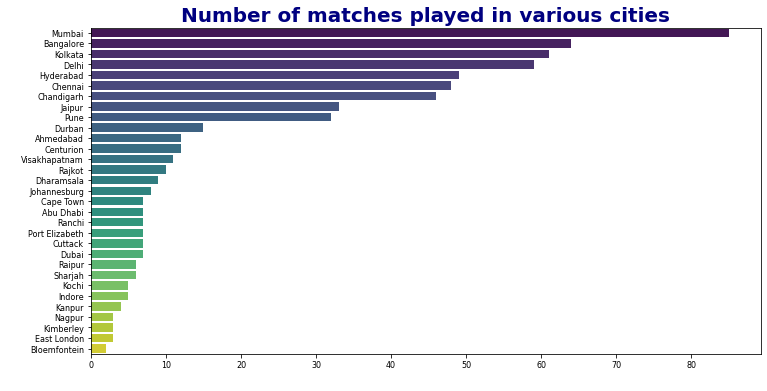

In [ ]:
plt.figure(figsize=(12,6))
city_ord=df_match['city'].value_counts().index.tolist()
sns.countplot(y=df_match['city'],palette='viridis',order=city_ord)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k')
plt.yticks(fontsize = 8, color = 'k')
plt.show()

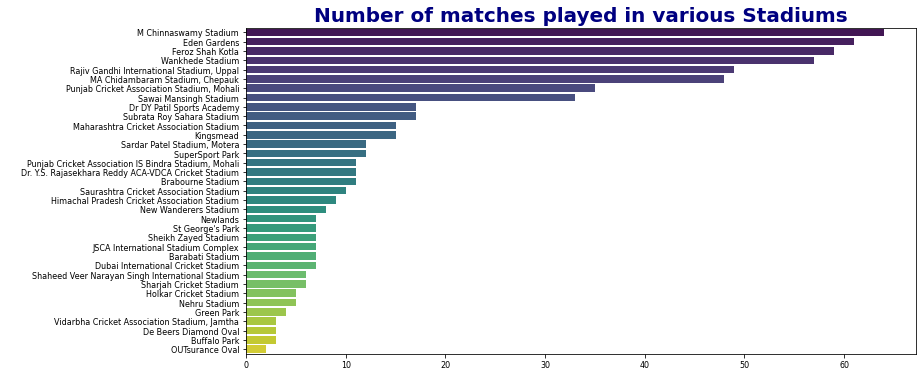

In [ ]:
plt.figure(figsize=(12,6))
city_ord=df_match['venue'].value_counts().index.tolist()
sns.countplot(y=df_match['venue'],palette='viridis',order=city_ord)
plt.title('Number of matches played in various Stadiums',fontsize = 20, fontweight = 'bold', color='navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 8, color = 'k')
plt.yticks(fontsize = 8, color = 'k')
plt.show()

In [ ]:
#top teams
df_match['winner'].value_counts().to_frame().rename({'winner': 'Total Wins'}, axis =1).style.background_gradient('mako_r')

,Total Wins
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Sunrisers Hyderabad,71
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Rising Pune Supergiant,15
Gujarat Lions,13


In [ ]:
#top 10 players
df_match['player_of_match'].value_counts().head(10).to_frame().rename({'player_of_match':'Player of Match'},axis=1).style.background_gradient('mako_r')

,Player of Match
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
MS Dhoni,13
G Gambhir,13
AM Rahane,12
MEK Hussey,12


In [ ]:
#Highest chasing score
high=df['total_runs'].value_counts().index.sort_values(ascending=False).tolist()[:11]
high

[246.0, 240.0, 230.0, 222.0, 221.0, 218.0, 214.0, 213.0, 212.0, 211.0, 209.0]

In [ ]:
tm=[]
for i in high:
  k=df[df['total_runs']==i]['batting_team'].values[0]
  tm.append(k)
tm

['Rajasthan Royals',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Rajasthan Royals',
 'Gujarat Lions',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Kolkata Knight Riders']

In [ ]:
high_score=pd.DataFrame({'Team':tm,'High Score':high})
high_score.style.background_gradient('mako_r')

,Team,High Score
0,Rajasthan Royals,246.000000
1,Kings XI Punjab,240.000000
2,Mumbai Indians,230.000000
3,Royal Challengers Bangalore,222.000000
4,Rajasthan Royals,221.000000
5,Delhi Daredevils,218.000000
6,Rajasthan Royals,214.000000
7,Gujarat Lions,213.000000
8,Rajasthan Royals,212.000000
9,Chennai Super Kings,211.000000


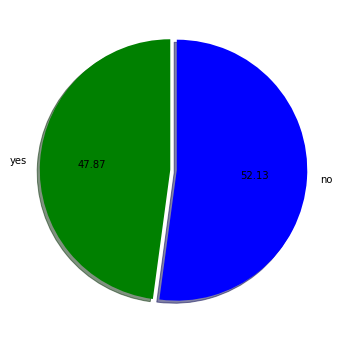

In [ ]:
plt.figure(figsize = (12,6))
toss_win=df_match[df_match['toss_winner'] == df_match['winner']]
toss_lose=df_match[df_match['toss_winner'] != df_match['winner']]
slices=[len(toss_win),len(toss_lose)]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%.2f',colors=['green','blue'])
fig = plt.gcf()
plt.show()

**4.Creating ML model**

In [ ]:
df.isna().sum()
df['Result'].value_counts()

1    12404
0    11752
Name: Result, dtype: int64

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,runs_left,balls_left,wickets,total_runs,crr,rrr,Result,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,...,city_Jaipur,city_Johannesburg,city_Kanpur,city_Kimberley,city_Kolkata,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Rajkot
41455,13.0,7,5,212.0,10.566372,11.142857,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12018,107.0,78,8,168.0,8.714286,8.230769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,162.0,113,9,165.0,2.571429,8.601770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10827,55.0,39,8,189.0,9.925926,8.461538,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6667,23.0,12,5,160.0,7.611111,11.500000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,116.0,79,4,142.0,3.804878,8.810127,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4971,132.0,81,9,191.0,9.076923,9.777778,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28747,69.0,27,6,184.0,7.419355,15.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3761,84.0,56,8,176.0,8.625000,9.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.isna().sum()

runs_left                                   1
balls_left                                  0
wickets                                     0
total_runs                                  0
crr                                         1
rrr                                         5
Result                                      0
batting_team_Delhi Daredevils               0
batting_team_Gujarat Lions                  0
batting_team_Kings XI Punjab                0
batting_team_Kolkata Knight Riders          0
batting_team_Mumbai Indians                 0
batting_team_Rajasthan Royals               0
batting_team_Rising Pune Supergiant         0
batting_team_Royal Challengers Bangalore    0
batting_team_Sunrisers Hyderabad            0
bowling_team_Delhi Daredevils               0
bowling_team_Gujarat Lions                  0
bowling_team_Kings XI Punjab                0
bowling_team_Kolkata Knight Riders          0
bowling_team_Mumbai Indians                 0
bowling_team_Rajasthan Royals     

In [ ]:
#need to drop infinity values
#it is in rrr column only
df.columns.to_series()[np.isinf(df).any()]
df.index[np.isinf(df).any(1)]

Int64Index([21617, 23798,  6008, 24681,  7596, 39020, 41463, 12098,  4066,
            16238, 48744, 25911, 40956, 46545, 33923, 48255, 41209, 49714,
            11352, 13861, 40234, 15739, 21366,  1207, 38518, 34408, 13249,
            19102, 31490, 38267, 30282, 28776,  8508,  8753, 26411, 11850,
             3565, 44087, 23546, 46790, 38770, 39746, 22788,  3317, 12997,
            14334,  7841,  4560, 17883, 50444, 33218,  5762, 43843, 29022,
            27593,  6253, 25666, 12577, 46293,  6681,  4809, 49970, 42206,
            10866, 32230, 29783, 32969,  5054, 24929, 45318, 44568, 47279,
            10195, 35832, 32477, 49465, 23035, 29277],
           dtype='int64')

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
x=df.drop(['Result'],axis=1)
y=df['Result']
x
y

41455    0
12018    0
27478    0
10827    1
6667     0
        ..
5681     0
4971     0
28747    0
3761     1
29942    1
Name: Result, Length: 24073, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train
x_test
y_train
y_test

18281    0
29953    1
42170    0
16439    1
11103    1
        ..
34979    1
12940    0
47739    1
29242    0
35981    1
Name: Result, Length: 4815, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=9)
svm=SVC()
nb=BernoulliNB()
tree=DecisionTreeClassifier()
random=RandomForestClassifier()
models=[lr,knn,svm,nb,tree,random]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  report=classification_report(y_pred,y_test)
  matrix=confusion_matrix(y_pred,y_test)
  print(i, score)
  print(report)
  print(matrix)
  print('******************************************************************************')

LogisticRegression() 0.8396677050882658
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2257
           1       0.86      0.84      0.85      2558

    accuracy                           0.84      4815
   macro avg       0.84      0.84      0.84      4815
weighted avg       0.84      0.84      0.84      4815

[[1899  358]
 [ 414 2144]]
******************************************************************************
KNeighborsClassifier(n_neighbors=9) 0.8637590861889928
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2357
           1       0.86      0.88      0.87      2458

    accuracy                           0.86      4815
   macro avg       0.86      0.86      0.86      4815
weighted avg       0.86      0.86      0.86      4815

[[2007  350]
 [ 306 2152]]
******************************************************************************
SVC() 0.7611630321910696
              

logistic regression and random forest gives the best model.Let's go with logistic Regression